# 1. Setup

In [48]:
# import system modules
import time
import sys
import os

# import third-party modules
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import msprime

# import comparrison modules
import dendropy

# import local phylokit modules
phylokit_path = os.path.abspath(os.path.join(os.pardir))
if phylokit_path not in sys.path:
    sys.path.append(phylokit_path)

import phylokit as pk

# set recursion limit
sys.setrecursionlimit(10000)

In [49]:
# Constants
MIN_LEAVES = 10000
MAX_LEAVES = 100000
STEP = 10000
REPEAT = 10

NUM_LEAVES = list(range(MIN_LEAVES, MAX_LEAVES, STEP))

### CPU INFO

In [50]:
if sys.platform.startswith('linux'):
    !lscpu
elif sys.platform.startswith('darwin'):
    !sysctl -n machdep.cpu.brand_string
elif sys.platform.startswith('win'):
    !wmic cpu get name

Apple M1 Pro


# 2. Utility functions

In [51]:
def get_tree(num_leaves):
    """
    Generate three trees with different format

    param: num_leaves int: number of leaves in the tree
    return: tsk_tree tskit.Tree: tskit tree,
            phylokit_tree xarray.DataSet: phylokit tree,
            dendropy_tree dendropy.Tree: dendropy tree
    """
    tsk_tree = msprime.sim_ancestry(samples=num_leaves, ploidy=1, random_seed=10086).first()
    #TODO update this to new dataset interface
    pk_tree = tsk_tree # pk_tree = pk.from_tskit(tsk_tree)

    newick_tree = tsk_tree.as_newick()
    dendropy_tree = dendropy.Tree.get(data=newick_tree, schema="newick")
    return tsk_tree, pk_tree, dendropy_tree

# Time comparison with different package

## 1. B1 Index

In [52]:
b1_tsk = []
b1_pk = []
b1_dendropy = []

progress = tqdm(NUM_LEAVES)

for i in progress:
    progress.set_description("{} leaves".format(i))
    # generate three trees
    tsk_tree, pk_tree, dendropy_tree = get_tree(i)
    
    b1_tsk_temp = []
    b1_pk_temp = []
    b1_dendropy_temp = []

    # warm up
    tsk_tree.b1_index()
    pk.b1_index(pk_tree)
    dendropy.calculate.treemeasure.B1(dendropy_tree)

    for _ in range(REPEAT):
        tsk_start = time.perf_counter()
        tsk_tree.b1_index()
        tsk_end = time.perf_counter()
        b1_tsk_temp.append(tsk_end - tsk_start)

        pk_start = time.perf_counter()
        pk.b1_index(pk_tree)
        pk_end = time.perf_counter()
        b1_pk_temp.append(pk_end - pk_start)

        dendropy_start = time.perf_counter()
        dendropy.calculate.treemeasure.B1(dendropy_tree)
        dendropy_end = time.perf_counter()
        b1_dendropy_temp.append(dendropy_end - dendropy_start)

    b1_tsk.append(np.mean(b1_tsk_temp))
    b1_pk.append(np.mean(b1_pk_temp))
    b1_dendropy.append(np.mean(b1_dendropy_temp))

90000 leaves: 100%|██████████| 9/9 [00:44<00:00,  4.94s/it]


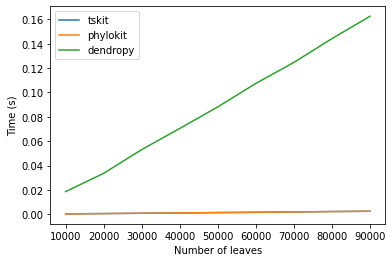

In [53]:
plt.plot(NUM_LEAVES, b1_tsk, label="tskit")
plt.plot(NUM_LEAVES, b1_pk, label="phylokit")
plt.plot(NUM_LEAVES, b1_dendropy, label="dendropy")
plt.legend()
plt.xlabel("Number of leaves")
plt.ylabel("Time (s)")
plt.show()

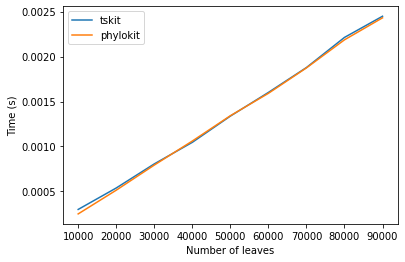

In [54]:
plt.plot(NUM_LEAVES, b1_tsk, label="tskit")
plt.plot(NUM_LEAVES, b1_pk, label="phylokit")
plt.legend()
plt.xlabel("Number of leaves")
plt.ylabel("Time (s)")
plt.show()

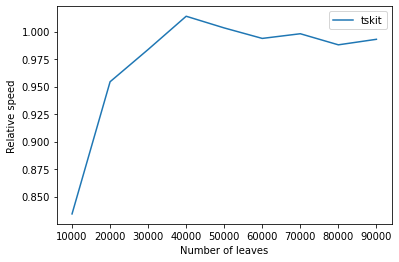

In [55]:
plt.plot(NUM_LEAVES, np.divide(b1_pk, b1_tsk), label="tskit")
plt.legend()
plt.xlabel("Number of leaves")
plt.ylabel("Relative speed")
plt.show()

## 2. Sackin Index

In [56]:
sackin_tsk = []
sackin_pk = []
sackin_dendropy = []

progress = tqdm(NUM_LEAVES)

for i in progress:
    progress.set_description("{} leaves".format(i))

    # generate three trees
    tsk_tree, pk_tree, dendropy_tree = get_tree(i)

    sackin_tsk_temp = []
    sackin_pk_temp = []
    sackin_dendropy_temp = []

    # warm up
    tsk_tree.sackin_index()
    pk.sackin_index(pk_tree)
    dendropy.calculate.treemeasure.sackin_index(dendropy_tree)

    for _ in range(REPEAT):
        tsk_start = time.perf_counter()
        tsk_tree.sackin_index()
        tsk_end = time.perf_counter()
        sackin_tsk_temp.append(tsk_end - tsk_start)

        pk_start = time.perf_counter()
        pk.sackin_index(pk_tree)
        pk_end = time.perf_counter()
        sackin_pk_temp.append(pk_end - pk_start)

        dendropy_start = time.perf_counter()
        dendropy.calculate.treemeasure.sackin_index(dendropy_tree)
        dendropy_end = time.perf_counter()
        sackin_dendropy_temp.append(dendropy_end - dendropy_start)
    
    sackin_tsk.append(np.mean(sackin_tsk_temp))
    sackin_pk.append(np.mean(sackin_pk_temp))
    sackin_dendropy.append(np.mean(sackin_dendropy_temp))

90000 leaves: 100%|██████████| 9/9 [00:51<00:00,  5.69s/it]


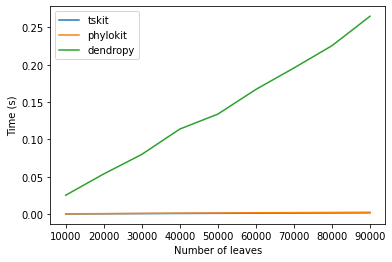

In [57]:
plt.plot(NUM_LEAVES, sackin_tsk, label="tskit")
plt.plot(NUM_LEAVES, sackin_pk, label="phylokit")
plt.plot(NUM_LEAVES, sackin_dendropy, label="dendropy")
plt.legend()
plt.xlabel("Number of leaves")
plt.ylabel("Time (s)")
plt.show()

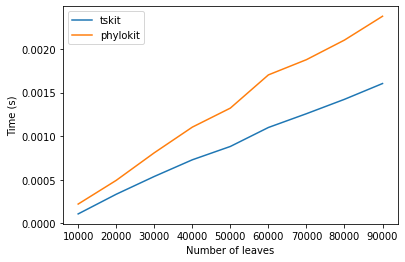

In [58]:
plt.plot(NUM_LEAVES, sackin_tsk, label="tskit")
plt.plot(NUM_LEAVES, sackin_pk, label="phylokit")
plt.legend()
plt.xlabel("Number of leaves")
plt.ylabel("Time (s)")
plt.show()

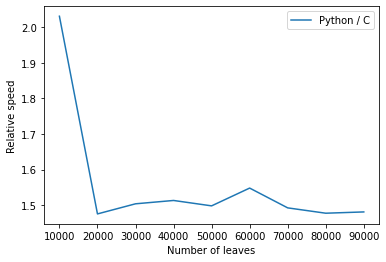

In [59]:
plt.plot(NUM_LEAVES, np.divide(sackin_pk, sackin_tsk), label="Python / C")
plt.legend()
plt.xlabel("Number of leaves")
plt.ylabel("Relative speed")
plt.show()

## 3. Colless Index

In [60]:
colless_tsk = []
colless_pk = []
colless_dendropy = []

progress = tqdm(NUM_LEAVES)

for i in progress:
    progress.set_description("{} leaves".format(i))

    # generate three trees
    tsk_tree, pk_tree, dendropy_tree = get_tree(i)

    colless_tsk_temp = []
    colless_pk_temp = []
    colless_dendropy_temp = []

    # warm up
    tsk_tree.colless_index()
    pk.colless_index(pk_tree)
    dendropy.calculate.treemeasure.colless_tree_imbalance(dendropy_tree)

    for _ in range(REPEAT):
        tsk_start = time.perf_counter()
        tsk_tree.colless_index()
        tsk_end = time.perf_counter()
        colless_tsk_temp.append(tsk_end - tsk_start)

        pk_start = time.perf_counter()
        pk.colless_index(pk_tree)
        pk_end = time.perf_counter()
        colless_pk_temp.append(pk_end - pk_start)

        dendropy_start = time.perf_counter()
        dendropy.calculate.treemeasure.colless_tree_imbalance(dendropy_tree)
        dendropy_end = time.perf_counter()
        colless_dendropy_temp.append(dendropy_end - dendropy_start)

    colless_tsk.append(np.mean(colless_tsk_temp))
    colless_pk.append(np.mean(colless_pk_temp))
    colless_dendropy.append(np.mean(colless_dendropy_temp))

90000 leaves: 100%|██████████| 9/9 [00:43<00:00,  4.86s/it]


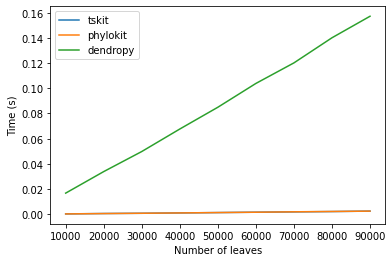

In [61]:
plt.plot(NUM_LEAVES, colless_tsk, label="tskit")
plt.plot(NUM_LEAVES, colless_pk, label="phylokit")
plt.plot(NUM_LEAVES, colless_dendropy, label="dendropy")
plt.legend()
plt.xlabel("Number of leaves")
plt.ylabel("Time (s)")
plt.show()

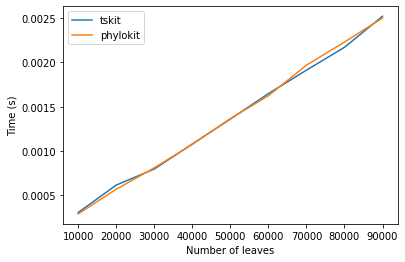

In [62]:
plt.plot(NUM_LEAVES, colless_tsk, label="tskit")
plt.plot(NUM_LEAVES, colless_pk, label="phylokit")
plt.legend()
plt.xlabel("Number of leaves")
plt.ylabel("Time (s)")
plt.show()

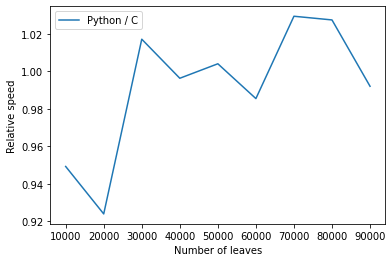

In [63]:
plt.plot(NUM_LEAVES, np.divide(colless_pk, colless_tsk), label="Python / C")
plt.legend()
plt.xlabel("Number of leaves")
plt.ylabel("Relative speed")
plt.show()

## 4. B2 Index

In [64]:
b2_tsk = []
b2_pk = []

progress = tqdm(NUM_LEAVES)

for i in progress:
    progress.set_description("{} leaves".format(i))

    # generate three trees
    tsk_tree, pk_tree, dendropy_tree = get_tree(i)

    b2_tsk_temp = []
    b2_pk_temp = []

    # warm up
    tsk_tree.b2_index()
    pk.b2_index(pk_tree)

    for _ in range(REPEAT):
        tsk_start = time.perf_counter()
        tsk_tree.b2_index()
        tsk_end = time.perf_counter()
        b2_tsk_temp.append(tsk_end - tsk_start)

        pk_start = time.perf_counter()
        pk.b2_index(pk_tree)
        pk_end = time.perf_counter()
        b2_pk_temp.append(pk_end - pk_start)
    
    b2_tsk.append(np.mean(b2_tsk_temp))
    b2_pk.append(np.mean(b2_pk_temp))

90000 leaves: 100%|██████████| 9/9 [00:35<00:00,  3.91s/it]


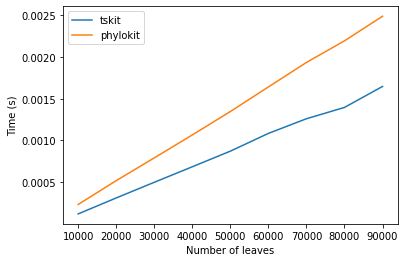

In [65]:
plt.plot(NUM_LEAVES, b2_tsk, label="tskit")
plt.plot(NUM_LEAVES, b2_pk, label="phylokit")
plt.legend()
plt.xlabel("Number of leaves")
plt.ylabel("Time (s)")
plt.show()

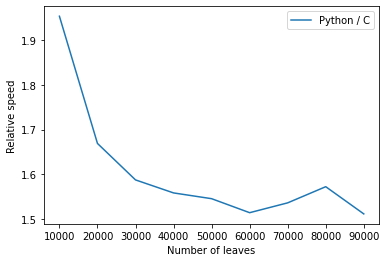

In [66]:
plt.plot(NUM_LEAVES, np.divide(b2_pk, b2_tsk), label="Python / C")
plt.legend()
plt.xlabel("Number of leaves")
plt.ylabel("Relative speed")
plt.show()